In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [162]:
types = {'fnlwgt': int, 'education': str,'education.num':int, 'marital.status': str, 'occupation': str, 'relationship': str, 'race': str, 'sex': str,'capital.gain':float,'captial.loss':float, 'hours.per.week':float,'native.country':str,'income>50K':int}
train = pd.read_csv('train_final.csv',dtype=types)
test = pd.read_csv('test_final.csv')

In [163]:
train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income>50K
0,53,Self-emp-not-inc,93449,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0,40.0,India,1
1,33,Self-emp-not-inc,123424,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0,40.0,United-States,1
2,47,Private,144844,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0,40.0,United-States,0
3,40,Private,114580,HS-grad,9,Divorced,Craft-repair,Other-relative,White,Female,0.0,0,40.0,Vietnam,0
4,39,Private,115618,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0,50.0,United-States,0


In [164]:
# data cleaning
# drop education column
train.drop('education', inplace=True, axis=1)
test.drop('education', inplace=True, axis=1)
train.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income>50K']

In [165]:
# check for nulls
train.isna().sum()

age               0
workclass         0
fnlwgt            0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income>50K        0
dtype: int64

In [166]:
# check for duplicates
print("Train data:")
print("Before removing duplicates:", train.duplicated().sum())

train = train[~train.duplicated()]

print("After removing duplicates:", train.duplicated().sum())

print("Test data:")
print("Before removing duplicates:", test.duplicated().sum())

test = test[~test.duplicated()]

print("After removing duplicates:", test.duplicated().sum())



Train data:
Before removing duplicates: 14
After removing duplicates: 0
Test data:
Before removing duplicates: 0
After removing duplicates: 0


In [167]:
columns = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for column in columns:
    train[column] = train[column].str.strip()
    test[column] = test[column].str.strip()

In [168]:
train['workclass'].value_counts()

Private             17323
Self-emp-not-inc     1978
Local-gov            1617
?                    1436
State-gov            1037
Self-emp-inc          845
Federal-gov           730
Without-pay            15
Never-worked            5
Name: workclass, dtype: int64

In [169]:
train['marital.status'].value_counts()

Married-civ-spouse       11438
Never-married             8218
Divorced                  3411
Widowed                    837
Separated                  729
Married-spouse-absent      326
Married-AF-spouse           27
Name: marital.status, dtype: int64

In [170]:
train['occupation'].value_counts()

Prof-specialty       3202
Exec-managerial      3171
Craft-repair         3144
Adm-clerical         2826
Sales                2727
Other-service        2546
Machine-op-inspct    1580
?                    1441
Transport-moving     1192
Handlers-cleaners    1047
Tech-support          743
Farming-fishing       733
Protective-serv       506
Priv-house-serv       118
Armed-Forces           10
Name: occupation, dtype: int64

In [171]:
test['workclass'].value_counts()

Private             16570
Self-emp-not-inc     1884
Local-gov            1519
?                    1362
State-gov             944
Self-emp-inc          850
Federal-gov           702
Without-pay             6
Never-worked            5
Name: workclass, dtype: int64

In [172]:
# change '?' to Unknown 
columns = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for column in columns:
    train[column] = train[column].replace({'?': 'Unknown'})
    test[column] = test[column].replace({'?': 'Unknown'})

/home/kaeleen/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


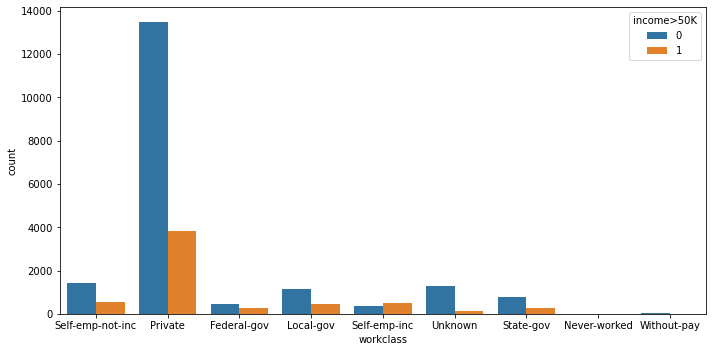

In [173]:
# Feature exploration
# workclass
fig = plt.figure(figsize=(10,5))
sns.countplot('workclass', hue='income>50K', data=train)
plt.tight_layout()
plt.show()

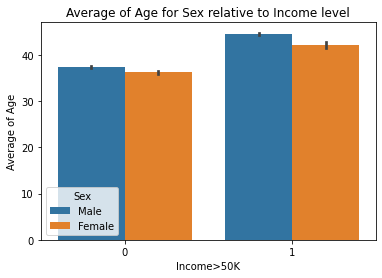

In [174]:
# sex and age 
plt.figure()
ax = sns.barplot(data = train, x = 'income>50K', y = 'age', hue = 'sex')
ax.legend(title = 'Sex')
plt.title('Average of Age for Sex relative to Income level')
plt.xlabel('Income>50K')
plt.ylabel('Average of Age');

/home/kaeleen/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


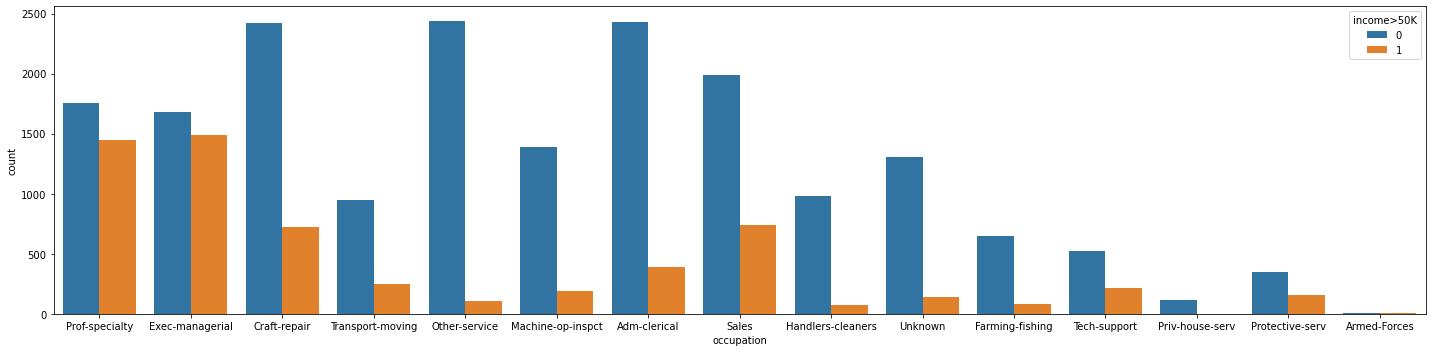

In [76]:
# workclass
fig = plt.figure(figsize=(20,5))
sns.countplot('occupation', hue='income>50K', data=train)
plt.tight_layout()
plt.show()

In [178]:
# data prepration 
# make a copy of train and test data 
train_prep = train.copy()
test_prep = test.copy()

ID = test_prep['ID']
test_prep = test_prep.drop('ID', axis=1)

In [179]:
# encoding
train_prep['sex'].replace(to_replace = ['Female', 'Male'], value =[0,1], inplace=True)
test_prep['sex'].replace(to_replace = ['Female', 'Male'], value =[0,1], inplace=True)



In [181]:
# get cat_columns
cat_columns = ["workclass", "marital.status","occupation","relationship","race","native.country"]

In [182]:
train_prep = pd.get_dummies(train_prep, prefix_sep="__",
                              columns=cat_columns)

In [183]:
cat_dummies = [col for col in train_prep
               if "__" in col 
               and col.split("__")[0] in cat_columns]
processed_columns = list(train_prep.columns[:])

In [184]:
test_prep = pd.get_dummies(test_prep, prefix_sep="__", 
                                   columns=cat_columns)

In [185]:
# remove additional columns
for col in test_prep:
    if ("__" in col) and (col.split("__")[0] in cat_columns) and col not in cat_dummies:
        print("Removing additional feature {}".format(col))
        test_prep.drop(col, axis=1, inplace=True)

Removing additional feature native.country__Holand-Netherlands


In [186]:
# Add missing columns
for col in cat_dummies:
    if col not in test_prep:
        print("Adding missing feature {}".format(col))
        test_prep[col] = 0

In [187]:
x_train = train_prep.drop('income>50K', axis=1)
y_train = train_prep['income>50K']

In [188]:
x_train

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,workclass__Federal-gov,workclass__Local-gov,workclass__Never-worked,...,native.country__Puerto-Rico,native.country__Scotland,native.country__South,native.country__Taiwan,native.country__Thailand,native.country__Trinadad&Tobago,native.country__United-States,native.country__Unknown,native.country__Vietnam,native.country__Yugoslavia
0,53,93449,15,1,0.0,0,40.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,123424,13,1,0.0,0,40.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,47,144844,9,1,0.0,0,40.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,40,114580,9,0,0.0,0,40.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,39,115618,9,1,0.0,0,50.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,83451,9,0,0.0,0,25.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24996,64,202738,9,0,0.0,0,35.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
24997,39,225544,14,1,0.0,0,40.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,53,346871,9,1,4787.0,0,46.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [189]:
test_prep

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,workclass__Federal-gov,workclass__Local-gov,workclass__Never-worked,...,native.country__Puerto-Rico,native.country__Scotland,native.country__South,native.country__Taiwan,native.country__Thailand,native.country__Trinadad&Tobago,native.country__United-States,native.country__Unknown,native.country__Vietnam,native.country__Yugoslavia
0,33,222162,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,68,29240,9,0,0,0,12,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,34,103596,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,57,103403,3,1,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,48,152915,10,0,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23837,26,43408,13,1,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
23838,27,116372,13,0,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
23839,67,182581,10,1,20051,0,20,0,0,0,...,0,0,0,0,0,0,1,0,0,0
23840,46,274689,12,1,0,0,40,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [191]:
logi = LogisticRegression()

In [192]:
logi.fit(x_train, y_train)

LogisticRegression()

In [206]:
prediction = logi.predict(test_prep)

In [211]:
prediction = pd.Series(prediction, name="prediction")

In [212]:
res = pd.concat([ID, prediction], axis=1)


In [214]:
res.to_csv('pred1.csv', encoding='utf-8', index=False)

In [216]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [217]:
dt_prediction = dt.predict(test_prep)

In [218]:
dt_prediction = pd.Series(dt_prediction, name="prediction")

In [219]:
res_dt = pd.concat([ID, dt_prediction], axis=1)

In [220]:
res_dt.to_csv('pred_dt.csv', encoding='utf-8', index=False)